# The actions
In our example, the actions will be the direct locations that a robot can go to from a particular location. Consider, a robot is at the L8 location and the direct locations to which it can move are L5, L7 and L9. The below figure may come in handy in order to visualize this.
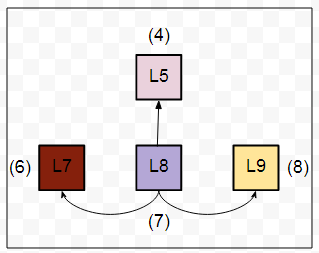Sample actions
As you might have already guessed the set of actions here is nothing but the set of all possible states of the robot. For each location, the set of actions that a robot can take will be different. For example, the set of actions will change if the robot is in L1.

## The Rewards
By now, we have the following two sets:

A set of states:

S
=
0
,
1
,
2
,
3
,
4
,
5
,
6
,
7
,
8

A set of actions:

A
=
0
,
1
,
2
,
3
,
4
,
5
,
6
,
7
,
8

The rewards, now, will be given to a robot if a location (read it state) is directly reachable from a particular location. Let’s take an example:

L9 is directly reachable from L8. So, if a robot goes from L8 to L9 and vice-versa, it will be rewarded by 1. If a location is not directly reachable from a particular location, we do not give any reward (a reward of 0).The reward is just a number here and nothing else. 

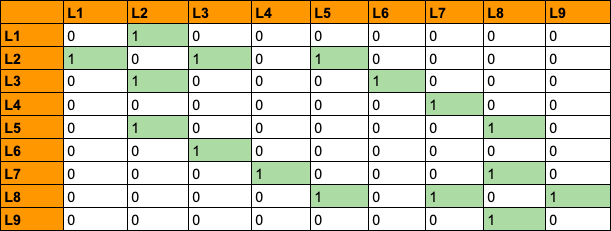
                                                     Table of rewards

Reference -- https://blog.floydhub.com/an-introduction-to-q-learning-reinforcement-learning/

In [67]:
import numpy as np

In [68]:
# Initialize parameters
gamma = 0.75 # Discount factor 
alpha = 0.9 # Learning rate 

In [69]:
# Define the states
location_to_state = {
    'L1' : 0,
    'L2' : 1,
    'L3' : 2,
    'L4' : 3,
    'L5' : 4,
    'L6' : 5,
    'L7' : 6,
    'L8' : 7,
    'L9' : 8
}

In [70]:
# Define the actions
actions = [0,1,2,3,4,5,6,7,8]

In [71]:
# Define the rewards
rewards = np.array([[0,1,0,0,0,0,0,0,0],
              [1,0,1,0,1,0,0,0,0],
              [0,1,0,0,0,1,0,0,0],
              [0,0,0,0,0,0,1,0,0],
              [0,1,0,0,0,0,0,1,0],
              [0,0,1,0,0,0,0,0,0],
              [0,0,0,1,0,0,0,1,0],
              [0,0,0,0,1,0,1,0,1],
              [0,0,0,0,0,0,0,1,0]])

In [72]:
# Maps indices to locations
state_to_location = dict((state,location) for location,state in location_to_state.items())

In [73]:
def get_optimal_route(start_location,end_location):
    # Copy the rewards matrix to new Matrix
    rewards_new = np.copy(rewards)
    
    # Get the ending state corresponding to the ending location as given
    ending_state = location_to_state[end_location]
    
    # With the above information automatically set the priority of  
    # the given ending state to the highest one
    rewards_new[ending_state,ending_state] = 999

    # -----------Q-Learning algorithm-----------
   
    # Initializing Q-Values
    Q = np.array(np.zeros([9,9]))

    # Q-Learning process
    for i in range(1000):
        # Pick up a state randomly
        current_state = np.random.randint(0,9) # Python excludes the upper bound
        
        # For traversing through the neighbor locations in the maze
        playable_actions = []
        
        # Iterate through the new rewards matrix and get the actions > 0
        for j in range(9):
            if rewards_new[current_state,j] > 0:
                playable_actions.append(j)
        
        # Pick an action randomly from the list of playable actions  
        # leading us to the next state
        next_state = np.random.choice(playable_actions)
        
        # Compute the temporal difference
        # The action here exactly refers to going to the next state
        TD = rewards_new[current_state,next_state] + gamma * Q[next_state, np.argmax(Q[next_state,])] - Q[current_state,next_state]
        # Update the Q-Value using the Bellman equation
        Q[current_state,next_state] += alpha * TD

    # Initialize the optimal route with the starting location
    route = [start_location]
    # We do not know about the next location yet, so initialize with the value of 
    # starting location
    next_location = start_location
    
    # We don't know about the exact number of iterations
    # needed to reach to the final location hence while loop will be a good choice 
    # for iteratiing
    
    while(next_location != end_location):
        # Fetch the starting state
        starting_state = location_to_state[start_location]
        
        # Fetch the highest Q-value pertaining to starting state
        next_state = np.argmax(Q[starting_state,])
        
        # We got the index of the next state. But we need the corresponding letter. 
        next_location = state_to_location[next_state]
        route.append(next_location)
        
        # Update the starting location for the next iteration
        start_location = next_location
    
    return route

In [74]:
print(get_optimal_route('L9','L1'))

['L9', 'L8', 'L5', 'L2', 'L1']
